## Importing Libraries

In this notebook, we'll examine the impact of choosing n in our n-grams across two libraries of texts. Onelibrary is comprised of several full-length novels, while another consists of articles of varying lenghts. We'llﬁrst deﬁne several helper functions that will be re-used throughout this process (each one is commented).We'll then proceed to evaluate our choice of n, per library, and then ﬁnally, use that n-value to compare ourlibrary of texts and return Jaccard similarity values for the more similiar texts.

**Final Report**
- Which articles / books were similar and which ones were dissimilar?
- A brief write-up explaining why and how you chose “n” for you analysis (for n-grams)
- Was the “n” identical or different for books vs. articles and why
- Visualize the selection of “n”
- Include all of your program codes (creating n-grams from text as well as selecting the “n” for analysis)

In [68]:
from __future__ import division
import nltk
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1.Defining Functions

In [56]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    #stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    if '.ipynb_checkpoints' in dir:
        dir.remove('.ipynb_checkpoints')
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
            
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary            

## 2.Clean file: convert to lower case, remove stopwords, punctuation, numbers, etc

In [31]:
# book = '3boat10.txt'
dir = ''

In [28]:
def clean_file(file, isBook):
    # read file
    if isBook:
        f = open(dir+'books/'+file, encoding="utf8")
    else:    
        f = open(dir+'articles/'+file, encoding="utf8")
        
    raw = f.read()
    f.close()
 
    # clean the text
    tokens = nltk.word_tokenize(raw)
    #stopwords = stopwords.words('english')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    # Filter out words that have punctuation and make everything lower-case
    cleaned_words = [w.lower() for w in tokens if w.isalnum()]
    # Remove stopwords
    cleaned_words = [word for word in cleaned_words if word not in stopwords]

    # change back to string
    str_result = ' '.join(cleaned_words)
    # output as txt file
    if isBook:
        cleaned_dir = dir+'books_cleaned/'
    else:
        cleaned_dir = dir+'articles_cleaned/'
        
    result = open(cleaned_dir+'cleaned_'+file, "wt", encoding="utf8")
    n = result.write(str_result)
    result.close()

In [19]:
book_list = os.listdir(dir+'books/')
article_list = os.listdir(dir+'articles/')

In [29]:
for book in book_list:
    clean_file(book, True)

In [30]:
for article in article_list:
    clean_file(article, False)

## 3.Choosing 'N'

In order to determine a proper N-value for a n-grams, we evaluate the impact of N over a range of 2 to 20.
We do this by repeating our similarity measure (Jaccardian similarity) for each N, and plotting similairity.

### 3.1 Running for Books

#### 3.1.1 Raw file comparison

In [4]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir+'books/',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

**Plot the distributions**

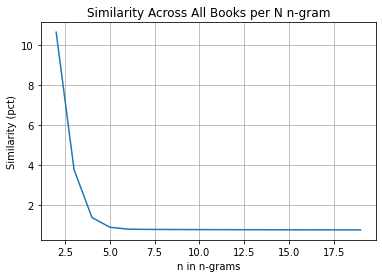

In [5]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

#### 3.1.2 Cleaned file comparison

In [42]:
os.listdir(dir+'books_cleaned/')

['.ipynb_checkpoints',
 'cleaned_3boat10.txt',
 'cleaned_Adventures_of_Sherlock_Holmes.txt',
 'cleaned_Hound_of_the_Baskervilles.txt',
 'cleaned_Return_of_Sherlock_Holmes.txt']

In [195]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir+'books_cleaned/',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

In [197]:
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
import matplotlib.ticker as mticker

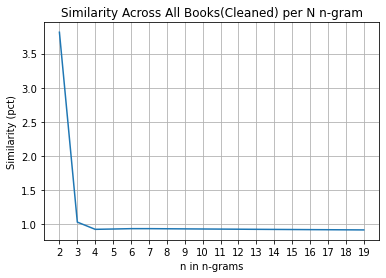

In [198]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books(Cleaned) per N n-gram')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid()
plt.show()

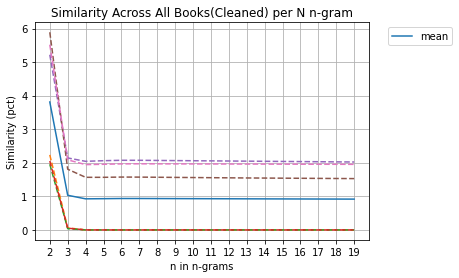

In [200]:
labels = list(books_comparison.keys())
plt.plot(x, y, linestyle = '-', label='mean')
plt.plot(x, yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books(Cleaned) per N n-gram')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()
plt.show()

**From the above plots for the cleaned books, I would choose n to be 3 for book since the elbow point for all y are around 3.**

### 3.2 Running for Articles

#### 3.2.1 Raw file comparison

In [6]:
x = []
y = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files(dir+'articles/',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

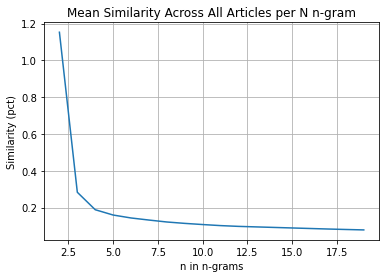

In [7]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

#### 3.2.2 Cleaned file comparison

In [201]:
x = []
y = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files(dir+'articles_cleaned/',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

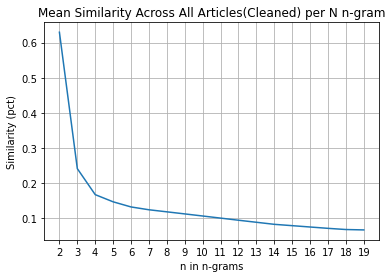

In [202]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles(Cleaned) per N n-gram')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid()
plt.show()

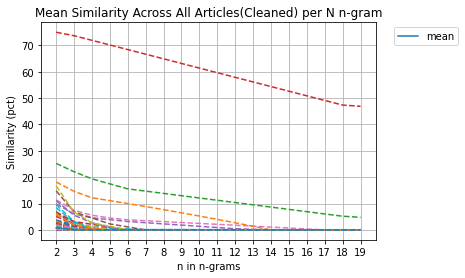

In [203]:
plt.plot(x, y, linestyle = '-', label='mean')
plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles(Cleaned) per N n-gram')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()
plt.show()

**Here, from the above plots, I would choose n = 4 for article, which is also the elbow point for the plot.**

## 4.Books measuring similarity

### 4.1 Check for most similar

After having our n for books chosen as '???', we'll examine the similairty of our set of books, and use a
threshold value of ???%. This threshold value will filter our any books with similarities below that value, in order
to allow us to focus on the most promininent combinations of books that are similar.

In [123]:
book_result = pd.DataFrame()
book1s = []
book2s = []
book_similarity = []

In [124]:
books_comparison = compare_files(dir+'books/',ngram_size=3,threshold=0.01)


for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    book1s.append(str(book1))
    book2s.append(str(book2))
    book_similarity.append(similarity_index)
    
#     print ("1")
#     print (str(book1) + " is similar to " + str(book2) + 
#            " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

In [125]:
book_result['book1'] = book1s
book_result['book2'] = book2s
book_result['similarity'] = book_similarity
book_result = book_result.sort_values(by=['similarity'], ascending=False)
book_result = book_result.reset_index(drop=True)
book_result

,book1,book2,similarity
0,Adventures_of_Sherlock_Holmes.txt,Return_of_Sherlock_Holmes.txt,0.056684
1,Hound_of_the_Baskervilles.txt,Return_of_Sherlock_Holmes.txt,0.052957
2,Adventures_of_Sherlock_Holmes.txt,Hound_of_the_Baskervilles.txt,0.051794
3,3boat10.txt,Adventures_of_Sherlock_Holmes.txt,0.022727
4,3boat10.txt,Return_of_Sherlock_Holmes.txt,0.022137
5,3boat10.txt,Hound_of_the_Baskervilles.txt,0.019884


In [138]:
import matplotlib.pyplot as plt
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i]/2,3),round(y[i],3), ha = 'center', Bbox = dict(facecolor = 'white', alpha = .5))

<ipython-input-138-ccc7c907616a>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i,round(y[i]/2,3),round(y[i],3), ha = 'center', Bbox = dict(facecolor = 'white', alpha = .5))


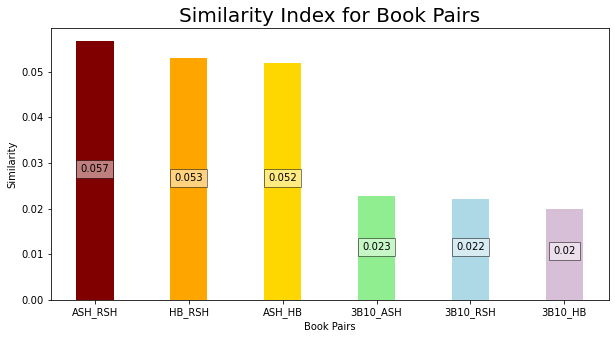

In [139]:
#plt.plot((book_result['book1'], book_result['book2']), book_result[['similarity']])

fig = plt.figure(figsize = (10, 5))

x = ['ASH_RSH', 'HB_RSH', 'ASH_HB', '3B10_ASH', '3B10_RSH', '3B10_HB']
y = book_result['similarity']
# creating the bar plot
plt.bar(x, y, color =['maroon', 'orange', 'gold', 'lightgreen', 'lightblue', 'thistle'],
        width = 0.4)
addlabels(x, y)
plt.xlabel("Book Pairs")
plt.ylabel("Similarity")
plt.title("Similarity Index for Book Pairs", fontsize=20)
plt.show()

**Acronym used as x label for better plot**:\
ASH: Adventures_of_Sherlock_Holmes\
RSH: Return_of_Sherlock_Holmes\
HB: Hound_of_the_Baskervilles\
3B10: 3boat10

**From the above plot, we could see that the book 'Adeventures_of_Sherlock_Holmes' and 'Return_of_Sherlock_Holmes' has the highest similarity of about 0.057%.**

### 4.2 Check for most dissimilar

In [169]:
book_result2 = pd.DataFrame()
book1s = []
book2s = []
book_similarity = []

books_comparison = compare_files(dir+'books/',ngram_size=3,threshold=-1)


for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    book1s.append(str(book1))
    book2s.append(str(book2))
    book_similarity.append(similarity_index)
    
book_result2['book1'] = book1s
book_result2['book2'] = book2s
book_result2['similarity'] = book_similarity
book_result2 = book_result2.sort_values(by=['similarity'], ascending=True)
book_result2 = book_result2.reset_index(drop=True)
book_result2

,book1,book2,similarity
0,3boat10.txt,Hound_of_the_Baskervilles.txt,0.019884
1,3boat10.txt,Return_of_Sherlock_Holmes.txt,0.022137
2,3boat10.txt,Adventures_of_Sherlock_Holmes.txt,0.022727
3,Adventures_of_Sherlock_Holmes.txt,Hound_of_the_Baskervilles.txt,0.051794
4,Hound_of_the_Baskervilles.txt,Return_of_Sherlock_Holmes.txt,0.052957
5,Adventures_of_Sherlock_Holmes.txt,Return_of_Sherlock_Holmes.txt,0.056684


<ipython-input-138-ccc7c907616a>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i,round(y[i]/2,3),round(y[i],3), ha = 'center', Bbox = dict(facecolor = 'white', alpha = .5))


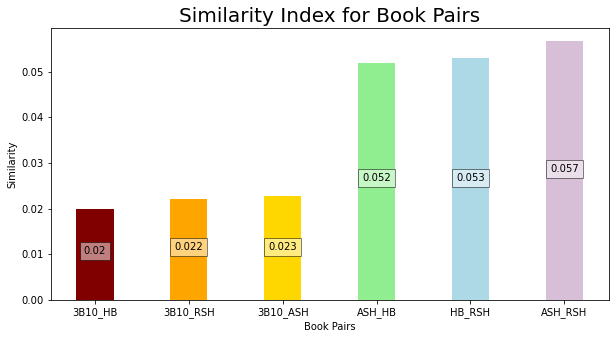

In [171]:
fig = plt.figure(figsize = (10, 5))

x = ['3B10_HB', '3B10_RSH', '3B10_ASH', 'ASH_HB', 'HB_RSH', 'ASH_RSH']
y = book_result2['similarity']
# creating the bar plot
plt.bar(x, y, color =['maroon', 'orange', 'gold', 'lightgreen', 'lightblue', 'thistle'],
        width = 0.4)
addlabels(x, y)
plt.xlabel("Book Pairs")
plt.ylabel("Similarity")
plt.title("Similarity Index for Book Pairs", fontsize=20)
plt.show()

**Acronym used as x label for better plot**:\
ASH: Adventures_of_Sherlock_Holmes\
RSH: Return_of_Sherlock_Holmes\
HB: Hound_of_the_Baskervilles\
3B10: 3boat10

**Similarly, from the above plot, we could see that the book '3boat10' and 'Hound_of_the_Baskervilles' has the lowest similarity of about 0.02%.**

## 5.Articles measuring similarity

After having our n for articles chosen as '???', we'll examine the similairty of our set of articles, and use a
threshold value of ???%. This threshold value will filter our any articles with similarities below that value, in
order to allow us to focus on the most promininent combinations of articles that are similar.

### 5.1 Check for most similar

In [118]:
article_result = pd.DataFrame()
article1s = []
article2s = []
article_similarity = []

In [119]:
articles_comparison = compare_files(dir+'articles/',ngram_size=4,threshold=0.01)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    article1s.append(str(art1))
    article2s.append(str(art2))
    article_similarity.append(similarity_index)
    
#     print (str(art1) + " is similar to " + str(art2) + 
#            " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

In [120]:
article_result['article1'] = article1s
article_result['article2'] = article2s
article_result['similarity'] = article_similarity
article_result = article_result.sort_values(by=['similarity'], ascending=False)
article_result = article_result.reset_index(drop=True)
article_result

,article1,article2,similarity
0,article16.txt,article17.txt,0.717172
1,article10.txt,article13.txt,0.196237
2,article3.txt,article4.txt,0.084112
3,article26.txt,article28.txt,0.082759
4,article14.txt,article6.txt,0.068627
5,article26.txt,article31.txt,0.059211
6,article28.txt,article31.txt,0.055556
7,article10.txt,article6.txt,0.053191
8,article10.txt,article14.txt,0.018648
9,article1.txt,article18.txt,0.018072


In [121]:
import re

a1 = article_result['article1'].apply(lambda x: re.sub("[^0-9]", "", str(x)))
a2 = article_result['article2'].apply(lambda x: re.sub("[^0-9]", "", str(x)))
x2 = 'a'+ a1 + '_a' + a2

<ipython-input-138-ccc7c907616a>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i,round(y[i]/2,3),round(y[i],3), ha = 'center', Bbox = dict(facecolor = 'white', alpha = .5))


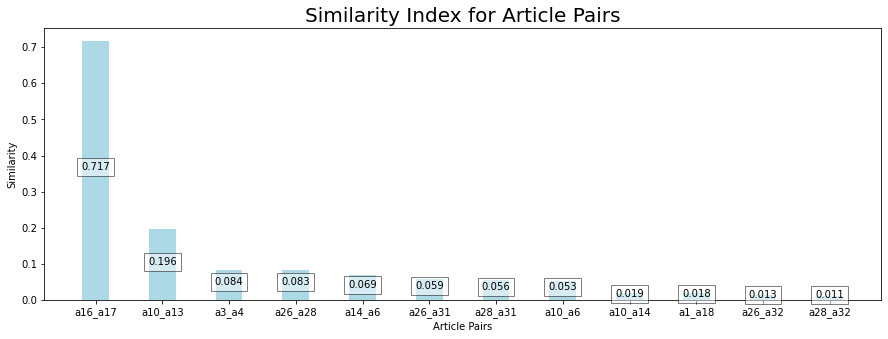

In [142]:
fig = plt.figure(figsize = (15, 5))
 
y2 = article_result['similarity']
# creating the bar plot
plt.bar(x2, y2, color ='lightblue',
        width = 0.4)
addlabels(x2, y2)
plt.xlabel("Article Pairs")
plt.ylabel("Similarity")
plt.title("Similarity Index for Article Pairs", fontsize=20)
plt.show()

**From the above plot, obviously, the article 16 and article 17 has the highest similarity of about 0.717%.**

### 5.2 Check for most dissimilar

In [173]:
article_result2 = pd.DataFrame()
article1s = []
article2s = []
article_similarity = []

articles_comparison = compare_files(dir+'articles/',ngram_size=4,threshold=-1)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    article1s.append(str(art1))
    article2s.append(str(art2))
    article_similarity.append(similarity_index)
    
article_result2['article1'] = article1s
article_result2['article2'] = article2s
article_result2['similarity'] = article_similarity
article_result2 = article_result2.sort_values(by=['similarity'], ascending=True)
article_result2 = article_result2.reset_index(drop=True)
article_result2

,article1,article2,similarity
0,article2.txt,article34.txt,0.000000
1,article24.txt,article30.txt,0.000000
2,article24.txt,article31.txt,0.000000
3,article24.txt,article32.txt,0.000000
4,article24.txt,article33.txt,0.000000
...,...,...,...
775,article14.txt,article6.txt,0.068627
776,article26.txt,article28.txt,0.082759
777,article3.txt,article4.txt,0.084112
778,article10.txt,article13.txt,0.196237


In [179]:
nonzero_result = article_result2[article_result2['similarity'] != 0]

In [183]:
nonzero_result

,article1,article2,similarity
750,article10.txt,article2.txt,0.001280
751,article40.txt,article9.txt,0.002070
752,article1.txt,article11.txt,0.002208
753,article1.txt,article10.txt,0.002326
754,article10.txt,article18.txt,0.002375
755,article7.txt,article9.txt,0.002740
756,article6.txt,article8.txt,0.003396
757,article10.txt,article8.txt,0.004158
758,article11.txt,article13.txt,0.004292
759,article22.txt,article5.txt,0.004608


In [180]:
a11 = nonzero_result['article1'].apply(lambda x: re.sub("[^0-9]", "", str(x)))
a22 = nonzero_result['article2'].apply(lambda x: re.sub("[^0-9]", "", str(x)))
x3 = 'a'+ a11 + '_a' + a22

<ipython-input-138-ccc7c907616a>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i,round(y[i]/2,3),round(y[i],3), ha = 'center', Bbox = dict(facecolor = 'white', alpha = .5))


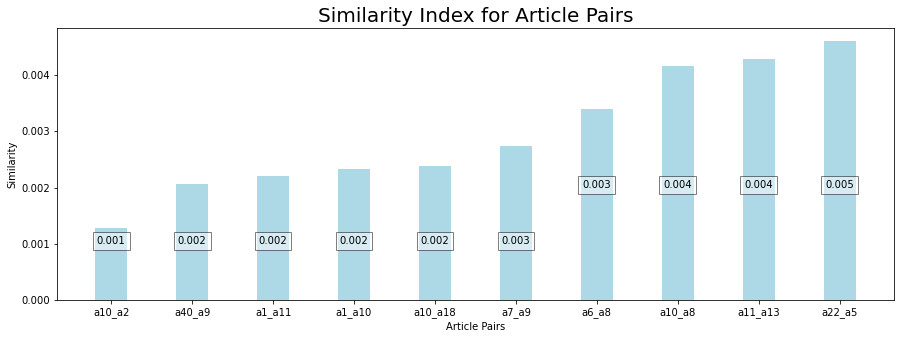

In [189]:
fig = plt.figure(figsize = (15, 5))
x3 = x3[0:10] 
y3 = list(nonzero_result['similarity'][0:10])
# creating the bar plot
plt.bar(x3, y3, color ='lightblue',
        width = 0.4)
addlabels(x3, y3)
plt.xlabel("Article Pairs")
plt.ylabel("Similarity")
plt.title("Similarity Index for Article Pairs", fontsize=20)
plt.show()

## 6. Final Report

- **Which articles / books were similar and which ones were dissimilar?**
    - For the books:
        - The book 'Adeventures_of_Sherlock_Holmes' and 'Return_of_Sherlock_Holmes' has the highest similarity of about 0.057%.
        - The book '3boat10' and 'Hound_of_the_Baskervilles' has the lowest similarity of about 0.02%.
    - For the articles:
        - The article 16 and article 17 has the highest similarity of about 0.717%.
        - From the result table, there are 750 pairs of articles that have a similarity of zero. The first non-zero pair is article 10 and article 2, with a similarity of 0.001%.
        
- **A brief write-up explaining why and how you chose “n” for you analysis (for n-grams)**
    - First, I write a function to clean up the files: convert the files to lowercase and then remove punctuation as well as stopwords. Then output the cleaned files to the new folders: "*books_cleaned*" and "*articles_cleaned*".
    - Then, I plot the mean similarity across all the cleaned books and cleaned articles. And I also plot the similarity for each pair of book and article. The method I use to find proper n is to check the elbow of the plot.
    - For books, for the overall mean similarity and for the similarity of each pair, the elbow is at around n = 3, thus I choose 3-grams for books.
    - For articles, since there are many pairs, it is hard to check the elbow on the similarity curve for each pair. By looking at the overall mean similarity, I found that n = 4 would be a proper choice here.
    
- **Was the “n” identical or different for books vs. articles and why**
    - The n is **3 for books** and **4 for articles**, which are different results.
    - The reason for this difference is that the length of the documents are different. The books are longer than the articles.
    - Also, the number of files are of great difference as well. There are only 4 books, but 40 articles for comparisons.
    
- **Visualize the selection of “n”**
    - See plots in the section '***3.Choosing 'N'*** '.
